# GRIPDEC21 @ The Sparks Foundation

# Author: Shivam Kumar

# DATA SCIENCE AND BUSINESS ANALYTICS INTERN

# TASK 2 - PREDICTION USING UNSUPERVISED ML

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris


In [2]:
#Loading data
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Defining target and predictors.

In [4]:
df = pd.DataFrame(data=iris.data, columns=['Sepal length','Sepal width','Petal length','Petal width'])
df['Target'] = pd.Series(iris.target)
df['Target_names'] = pd.Series(iris.target_names)
species = []
for i in range(len(df)):
    if df.iloc[i]['Target'] == 0:
        species.append('setosa')
    elif df.iloc[i]['Target'] == 1:
        species.append('versicolor')
    elif df.iloc[i]['Target'] == 2:
        species.append('virginica')
df['Species'] = species


In [5]:
df

,Sepal length,Sepal width,Petal length,Petal width,Target,Target_names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN,virginica
146,6.3,2.5,5.0,1.9,2,NaN,virginica
147,6.5,3.0,5.2,2.0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,2,NaN,virginica


In [6]:
x = iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Lets have a look at our data through a scatter plot.

Text(0, 0.5, 'Sepal length')

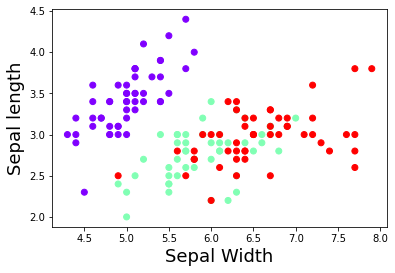

In [7]:
plt.scatter(x=df['Sepal length'], y=df['Sepal width'], c=iris.target, cmap='rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

## Using the elbow method to estimate the value of k

In [8]:
#To start, let's arbitrarily assign the value of k as 5. We will implement k-means clustering using k=5.
kmean5 = KMeans(n_clusters=5, init = 'k-means++', random_state = 0)
y = kmean5.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


In [9]:
kmean5.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.24722222, 2.84722222, 4.775     , 1.575     ]])

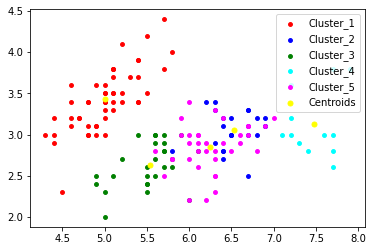

In [10]:
plt.scatter(x[y==0,0], x[y==0,1], s=15, c='red', label='Cluster_1')
plt.scatter(x[y==1,0], x[y==1,1], s=15, c='blue', label='Cluster_2')
plt.scatter(x[y==2,0], x[y==2,1], s=15, c='green', label='Cluster_3')
plt.scatter(x[y==3,0], x[y==3,1], s=15, c='cyan', label='Cluster_4')
plt.scatter(x[y==4,0], x[y==4,1], s=15, c='magenta', label='Cluster_5')
plt.scatter(kmean5.cluster_centers_[:,0], kmean5.cluster_centers_[:,1], s=25, c='yellow', label='Centroids')
plt.legend()
plt.show()

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


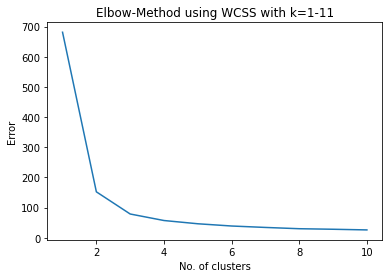

In [11]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow' 
Error=[]
for i in range(1,11):
    kmean11 = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0).fit(x)
    kmean11.fit(x)
    Error.append(kmean11.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11), Error)
plt.title('Elbow-Method using WCSS with k=1-11')
plt.xlabel('No. of clusters')
plt.ylabel('Error')
plt.show()

#### The output graph of the Elbow method is shown above. Note that the shape of elbow is approximately formed at k=3. 

## Now, lets instantiate and fit our K means cluster model. We are going to use three clusters and a random state of 21. 

In [12]:
# As we can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.
# Lets implement k-means again using k=3.
kmean3 = KMeans(n_clusters=3,random_state=21)
y = kmean3.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## With the following code, we can identify the center points of the data. 

In [13]:
kmean3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

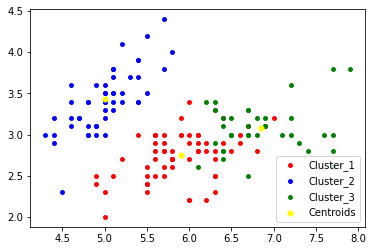

In [14]:
# Applying k-means to the dataset / Creating the k-means classifier
plt.scatter(x[y==0,0], x[y==0,1],s=15,c='red', label='Cluster_1')
plt.scatter(x[y==1,0], x[y==1,1],s=15,c='blue', label='Cluster_2')
plt.scatter(x[y==2,0], x[y==2,1],s=15,c='green', label='Cluster_3')
plt.scatter(kmean3.cluster_centers_[:,0], kmean3.cluster_centers_[:,1],s=25,c='yellow',label='Centroids')
plt.legend()
plt.show()

## Now, let's compare our original data versus our clustered results.

Text(0.5, 1.0, 'Predicted')

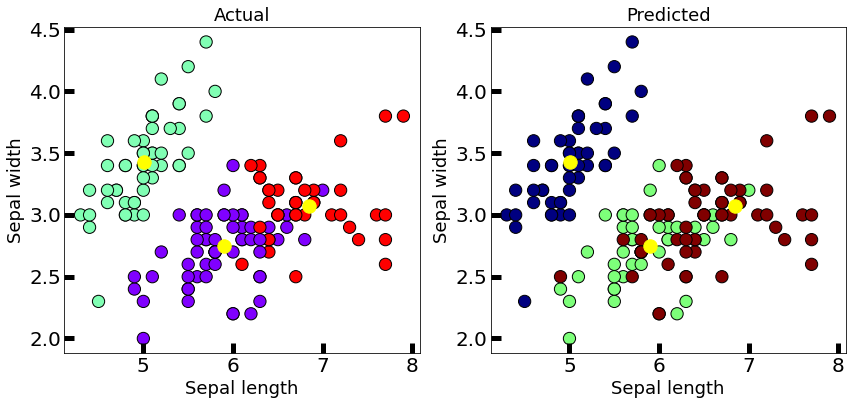

In [15]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['Sepal length'], y=df['Sepal width'], c=y, cmap='rainbow',edgecolor='k', s=150)
axes[1].scatter(x=df['Sepal length'], y=df['Sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].scatter(kmean3.cluster_centers_[:,0], kmean3.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')
axes[1].scatter(kmean3.cluster_centers_[:,0], kmean3.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Text(0.5, 1.0, 'Predicted')

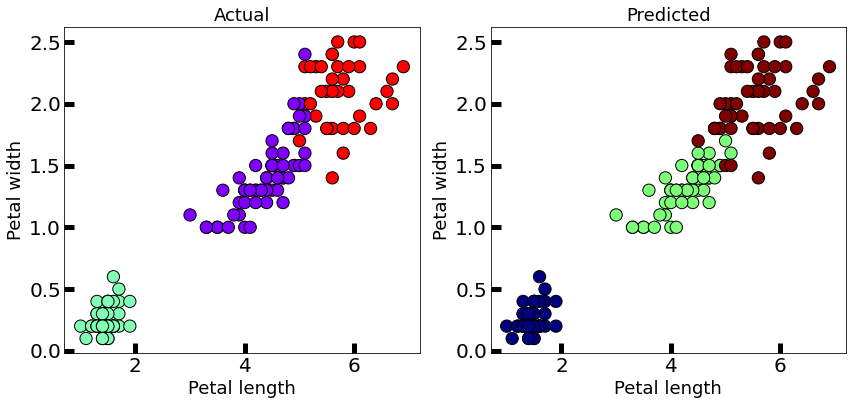

In [16]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['Petal length'], y=df['Petal width'], c=y, cmap='rainbow',edgecolor='k', s=150)
axes[1].scatter(x=df['Petal length'], y=df['Petal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)